<H1> Logistic Regression

Recall the linear model

$$y = \alpha + \beta x + \epsilon$$


Linear models are appropriate where the response variable ($y$) is continuous and the errors ($\epsilon$) are normally distributed. Many experimental designs (for example, case-control) have categorical outcomes and/or outcomes whose errors are not normally distributed. Categorical data can be analyzed using a method called 'logistic regression'. The theory was covered in the statistics lectures, so this lab will focus on the R implementation. We will briefly remind you of some definitions and notation.

In logistic regression, we model the *probability* of the outcome $y$, given the independent variable $x$. That is, 
$Y|x$ is Bernoulli, with success probability $p$ given by: 

$$\mathbb{E}(Y|x) = p = \frac{1}{1+e^{-(\alpha + \beta x)}}$$

Note that $p$ is bounded between $0$ and $1$ and is defined for all values of $\alpha + \beta x$.

We use the notation $expit(t)$ to denote the following:

$$expit(t) = \frac{1}{1+e^{-t}}$$

$expit$ is known as the *logistic function*.

and $logit(t)$ to denote:

$$logit(t) = \log\left(\frac{1}{1-t}\right)$$

Note that:

$$logit(expit(t)) = t$$

so that 

$$logit(p) = \alpha + \beta x$$

Because $logit(p) = logit(\mathbb{E(Y|x)})$, logistic regression is considered a *generalized linear model*. That just means (roughly!) that there is a function ($logit$, this case) that transforms the conditional expectation (the outcome, given the data) into a linear function. 

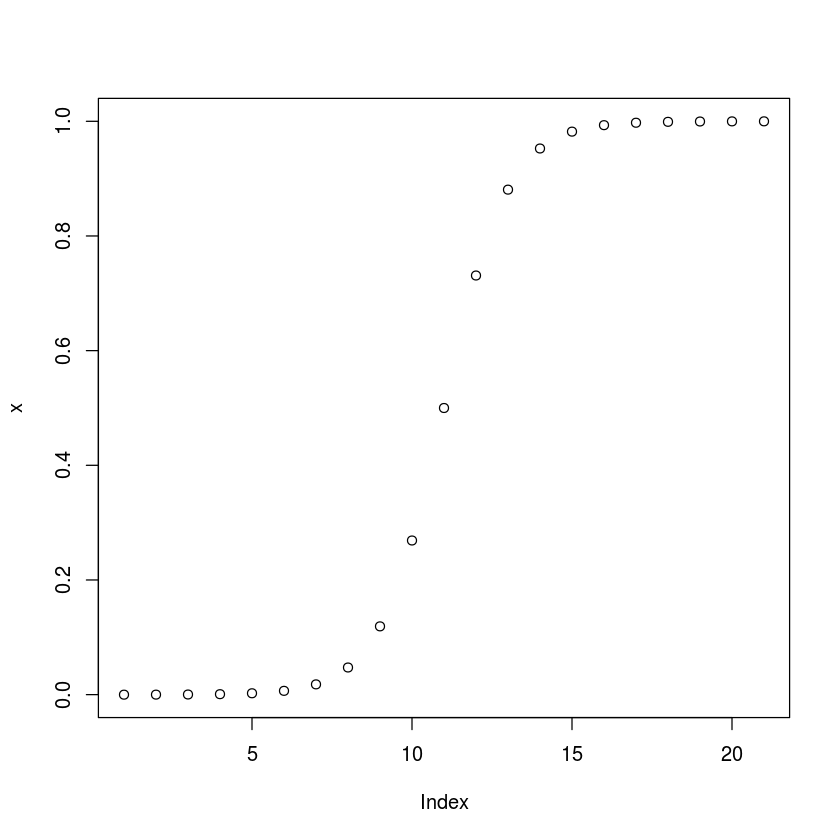

In [8]:
expit<-function(t){
    return(1/(1+exp(-t)))
}
x<-expit((-10:10))
plot(x)


So, how do we perform a logistic regression in R? First, let's get a data set:

In [9]:
Titanic<-read.csv("titanic.csv")

In [36]:
attach(Titanic)
#Titanic
library(plyr)
Titanic$pclass<-revalue(pclass, c("1st"=1, "2nd"=1,"3rd"=0))
Titanic

The following object is masked _by_ .GlobalEnv:

    pclass

The following objects are masked from Titanic (pos = 3):

    age, boat, embarked, home.dest, name, pclass, room, row.names, sex,
    survived, ticket

The following objects are masked from Titanic (pos = 4):

    age, boat, embarked, home.dest, name, pclass, room, row.names, sex,
    survived, ticket

The following objects are masked from Titanic (pos = 5):

    age, boat, embarked, home.dest, name, pclass, room, row.names, sex,
    survived, ticket

The following objects are masked from Titanic (pos = 6):

    age, boat, embarked, home.dest, name, pclass, room, row.names, sex,
    survived, ticket

The following objects are masked from Titanic (pos = 7):

    age, boat, embarked, home.dest, name, pclass, room, row.names, sex,
    survived, ticket

The following objects are masked from Titanic (pos = 9):

    age, boat, embarked, home.dest, name, pclass, room, row.names, sex,
    survived, ticket

The following `from` values

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
1,1,1,1,"Allen, Miss Elisabeth Walton",29,Southampton,"St Louis, MO",B-5,24160 L221,2,female
2,2,1,0,"Allison, Miss Helen Loraine",2,Southampton,"Montreal, PQ / Chesterville, ON",C26,,,female
3,3,1,0,"Allison, Mr Hudson Joshua Creighton",30,Southampton,"Montreal, PQ / Chesterville, ON",C26,,(135),male
4,4,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25,Southampton,"Montreal, PQ / Chesterville, ON",C26,,,female
5,5,1,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,,11,male
6,6,1,1,"Anderson, Mr Harry",47,Southampton,"New York, NY",E-12,,3,male
7,7,1,1,"Andrews, Miss Kornelia Theodosia",63,Southampton,"Hudson, NY",D-7,13502 L77,10,female
8,8,1,0,"Andrews, Mr Thomas, jr",39,Southampton,"Belfast, NI",A-36,,,male
9,9,1,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58,Southampton,"Bayside, Queens, NY",C-101,,2,female
10,10,1,0,"Artagaveytia, Mr Ramon",71,Cherbourg,"Montevideo, Uruguay",,,(22),male


In [37]:
fit.survive<-glm(survived ~ sex + age +pclass,family= "binomial")

In [38]:
summary(fit.survive)


Call:
glm(formula = survived ~ sex + age + pclass, family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8921  -0.6058  -0.3937   0.6404   2.3662  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.253859   0.455748   9.334  < 2e-16 ***
sexmale     -3.038911   0.232068 -13.095  < 2e-16 ***
age         -0.043624   0.008466  -5.153 2.57e-07 ***
pclass0     -1.988573   0.265334  -7.495 6.65e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 869.54  on 632  degrees of freedom
Residual deviance: 562.82  on 629  degrees of freedom
  (680 observations deleted due to missingness)
AIC: 570.82

Number of Fisher Scoring iterations: 5


In [43]:
fit.survive<-glm(survived ~ sex + age + pclass + sex:pclass + age:pclass,family= "binomial")

In [44]:
summary(fit.survive)


Call:
glm(formula = survived ~ sex + age + pclass + sex:pclass + age:pclass, 
    family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0532  -0.6230  -0.4089   0.6722   2.3374  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      4.736466   0.756171   6.264 3.76e-10 ***
sexmale         -3.685635   0.510927  -7.214 5.45e-13 ***
age             -0.042485   0.013044  -3.257  0.00113 ** 
pclass0         -2.555132   0.843040  -3.031  0.00244 ** 
sexmale:pclass0  0.861848   0.577553   1.492  0.13564    
age:pclass0     -0.002447   0.017231  -0.142  0.88708    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 869.54  on 632  degrees of freedom
Residual deviance: 560.15  on 627  degrees of freedom
  (680 observations deleted due to missingness)
AIC: 572.15

Number of Fisher Scoring iterations: 5
